**Read File**

In [2]:
import pandas as pd
df=pd.read_csv('erp_mixed_dataset.csv')
df.head(5)

,RecordID,Date,CustomerName,City,Product,LicenseType,Quantity,UnitPrice,TotalRevenue,SalesChannel,SalesRep,Target,Achieved,AchievementPercent,RenewalStatus,ChurnRisk
0,1,1/19/2024,Customer 85,Patna,ERP Pro,Monthly,7,2000,14000,Online,Neha Singh,64219,195953,305.13,Renewed,High
1,2,12/11/2024,Customer 96,Mumbai,ERP Pro,Annual,15,25000,375000,Online,Imran Ali,179204,138276,77.16,Not Renewed,Low
2,3,8/7/2024,Customer 47,Jaipur,ERP Lite,Annual,7,8000,56000,Direct,Ravi Kumar,85526,102246,119.55,Pending,Low
3,4,1/22/2025,Customer 149,Hyderabad,ERP Lite,Annual,7,800,5600,Direct,Imran Ali,115020,93961,81.69,Not Renewed,Medium
4,5,1/24/2025,Customer 175,Bengaluru,ERP Lite,Annual,18,800,14400,Online,Imran Ali,102889,150878,146.64,Not Renewed,Medium


**Get Details about data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RecordID            500 non-null    int64  
 1   Date                500 non-null    object 
 2   CustomerName        500 non-null    object 
 3   City                500 non-null    object 
 4   Product             500 non-null    object 
 5   LicenseType         500 non-null    object 
 6   Quantity            500 non-null    int64  
 7   UnitPrice           500 non-null    int64  
 8   TotalRevenue        500 non-null    int64  
 9   SalesChannel        500 non-null    object 
 10  SalesRep            500 non-null    object 
 11  Target              500 non-null    int64  
 12  Achieved            500 non-null    int64  
 13  AchievementPercent  500 non-null    float64
 14  RenewalStatus       500 non-null    object 
 15  ChurnRisk           500 non-null    object 
dtypes: float

**Checking data for inconsistencies**

In [13]:
print("---- BASIC SHAPE ----")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# --------------------------------------------------
# 1. Missing / Null Values
# --------------------------------------------------
print("\n---- MISSING VALUES ----")
missing = df.isnull().sum()
print(missing[missing > 0])

# --------------------------------------------------
# 2. Duplicate Records
# --------------------------------------------------
print("\n---- DUPLICATE RECORDS ----")
print("Duplicate rows:", df.duplicated().sum())

# --------------------------------------------------
# 3. Categorical Consistency Checks
# --------------------------------------------------
categorical_cols = ['Product', 'LicenseType', 'SalesChannel', 'RenewalStatus', 'ChurnRisk']

print("\n---- CATEGORICAL VALUE CHECKS ----")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())

# --------------------------------------------------
# 4. Achievement Percent Validation
# --------------------------------------------------
print("\n---- ACHIEVEMENT PERCENT VALIDATION ----")
print("Negative values:", (df['AchievementPercent'] < 0).sum())
print("Very high values (>200):", (df['AchievementPercent'] > 200).sum())

# --------------------------------------------------
# 5. Revenue & Quantity Validation
# --------------------------------------------------
print("\n---- REVENUE & QUANTITY CHECKS ----")
print("Negative revenue:", (df['TotalRevenue'] < 0).sum())
print("Zero revenue:", (df['TotalRevenue'] == 0).sum())
print("Negative quantity:", (df['Quantity'] < 0).sum())
print("Zero quantity:", (df['Quantity'] == 0).sum())

# --------------------------------------------------
# 6. Date Validation
# --------------------------------------------------
print("\n---- DATE VALIDATION ----")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print("Invalid dates:", df['Date'].isnull().sum())
print("Future dates:", (df['Date'] > pd.Timestamp.today()).sum())

# --------------------------------------------------
# 7. Churn & Renewal Logical Consistency
# --------------------------------------------------
print("\n---- CHURN vs RENEWAL CONSISTENCY ----")

invalid_churn = df[
    (df['RenewalStatus'] == 'Renewed') & (df['ChurnRisk'] == 'High')
]

print("Renewed but High churn risk:", invalid_churn.shape[0])

# --------------------------------------------------
# 8. Outlier Detection (Revenue)
# --------------------------------------------------
print("\n---- REVENUE OUTLIERS (IQR METHOD) ----")

Q1 = df['TotalRevenue'].quantile(0.25)
Q3 = df['TotalRevenue'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['TotalRevenue'] < (Q1 - 1.5 * IQR)) |
    (df['TotalRevenue'] > (Q3 + 1.5 * IQR))
]

print("Revenue outliers:", outliers.shape[0])


---- BASIC SHAPE ----
Rows: 500
Columns: 18

---- MISSING VALUES ----
Series([], dtype: int64)

---- DUPLICATE RECORDS ----
Duplicate rows: 0

---- CATEGORICAL VALUE CHECKS ----

Product value counts:
Product
ERP Pro         182
ERP Standard    167
ERP Lite        151
Name: count, dtype: int64

LicenseType value counts:
LicenseType
Monthly    257
Annual     243
Name: count, dtype: int64

SalesChannel value counts:
SalesChannel
Partner    181
Online     168
Direct     151
Name: count, dtype: int64

RenewalStatus value counts:
RenewalStatus
Not Renewed    187
Pending        161
Renewed        152
Name: count, dtype: int64

ChurnRisk value counts:
ChurnRisk
Low       176
High      170
Medium    154
Name: count, dtype: int64

---- ACHIEVEMENT PERCENT VALIDATION ----
Negative values: 0
Very high values (>200): 53

---- REVENUE & QUANTITY CHECKS ----
Negative revenue: 0
Zero revenue: 0
Negative quantity: 0
Zero quantity: 0

---- DATE VALIDATION ----
Invalid dates: 0
Future dates: 0

---- CHU

**1. Revenue & Performance Analysis**  
**How would you identify the top 5 cities contributing the highest total revenue?**

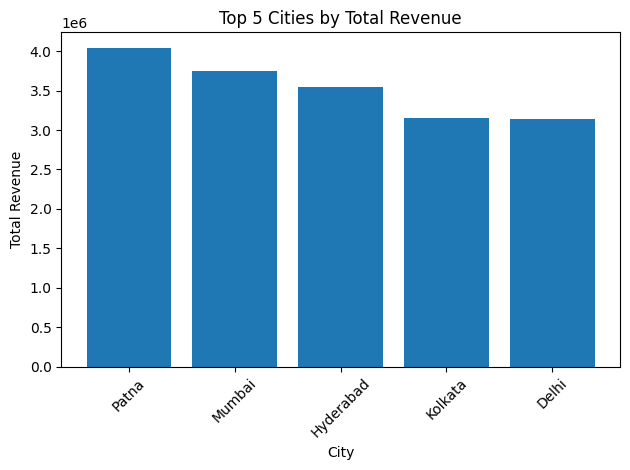

In [4]:
import matplotlib.pyplot as plt

# Aggregate total revenue by city and get top 5
city_revenue = (
    df.groupby('City')['TotalRevenue']
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

# Plot bar chart
plt.figure()
plt.bar(city_revenue.index, city_revenue.values)
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Top 5 Cities by Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Target vs Achievement Evaluation**  
**How would you analyze which sales reps are consistently underperforming against their targets?**

In [5]:
import matplotlib as plt

rep_performance = (
    df.groupby('SalesRep')
      .agg(
          avg_achievement=('AchievementPercent', 'mean'),
          deal_count=('AchievementPercent', 'count'),
          underperform_count=('AchievementPercent', lambda x: (x < 80).sum())
      )
      .reset_index()
)

# Calculate how often a rep underperforms
rep_performance['underperform_ratio'] = (
    rep_performance['underperform_count'] / rep_performance['deal_count']
)

rep_performance


,SalesRep,avg_achievement,deal_count,underperform_count,underperform_ratio
0,Amit Sharma,110.970538,93,38,0.408602
1,Imran Ali,117.193936,94,30,0.319149
2,Neha Singh,111.511207,116,45,0.387931
3,Pooja Verma,115.527802,91,36,0.395604
4,Ravi Kumar,114.003868,106,39,0.367925


**3. Product-Level Insights**  
**Compare the performance of ERP Lite vs ERP Pro across revenue, quantity sold, and renewal rate.**


In [6]:
# -----------------------------
# 1. Keep only ERP Lite & Pro
# -----------------------------
df_product = df[df['Product'].isin(['ERP Lite', 'ERP Pro'])].copy()

# -----------------------------
# 2. Handle Renewal Status
#    (exclude Pending)
# -----------------------------
df_closed = df_product[
    df_product['RenewalStatus'].isin(['Renewed', 'Not Renewed'])
].copy()

df_closed['RenewedFlag'] = (df_closed['RenewalStatus'] == 'Renewed').astype(int)

# -----------------------------
# 3. Aggregate metrics
# -----------------------------
product_performance = (
    df_closed.groupby('Product')
      .agg(
          total_revenue=('TotalRevenue', 'sum'),
          total_quantity=('Quantity', 'sum'),
          renewal_rate=('RenewedFlag', 'mean'),
          record_count=('Product', 'count')
      )
      .reset_index()
)

# Convert renewal rate to percentage
product_performance['renewal_rate'] *= 100

print(product_performance)


    Product  total_revenue  total_quantity  renewal_rate  record_count
0  ERP Lite        4342400            1144     41.747573           103
1   ERP Pro       16033000            1220     46.825397           126


**4. License Type Impact**  
**How does Monthly vs Annual license type affect total revenue and churn risk?**

In [8]:
# -----------------------------------
# 1. Total Revenue by License Type
# -----------------------------------
revenue_by_license = (
    df.groupby('LicenseType')['TotalRevenue']
      .sum()
      .reset_index(name='total_revenue')
)

print("Total Revenue by License Type:")
print(revenue_by_license)

# -----------------------------------
# 2. Churn Risk Distribution by License Type
# -----------------------------------
churn_distribution = (
    df.groupby('LicenseType')['ChurnRisk']
      .value_counts(normalize=True)
      .mul(100)
      .reset_index(name='percentage')
)

print("\nChurn Risk Distribution by License Type (%):")
print(churn_distribution)

# -----------------------------------
# 3. (Optional) Average Churn Score
# -----------------------------------
churn_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['ChurnScore'] = df['ChurnRisk'].map(churn_map)

avg_churn_score = (
    df.groupby('LicenseType')['ChurnScore']
      .mean()
      .reset_index(name='avg_churn_score')
)

print("\nAverage Churn Score by License Type:")
print(avg_churn_score)


Total Revenue by License Type:
  LicenseType  total_revenue
0      Annual       19549400
1     Monthly       21617200

Churn Risk Distribution by License Type (%):
  LicenseType ChurnRisk  percentage
0      Annual       Low   37.860082
1      Annual      High   33.333333
2      Annual    Medium   28.806584
3     Monthly      High   34.630350
4     Monthly       Low   32.684825
5     Monthly    Medium   32.684825

Average Churn Score by License Type:
  LicenseType  avg_churn_score
0      Annual         1.954733
1     Monthly         2.019455


**5. Churn Risk Analysis**  
**Which factors in this dataset appear most correlated with high churn risk?**

In [9]:
# ---------------------------------------
# 1. Encode churn risk for numeric analysis
# ---------------------------------------
churn_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['ChurnScore'] = df['ChurnRisk'].map(churn_map)

# ---------------------------------------
# 2. Correlation with numeric variables
# ---------------------------------------
numeric_corr = (
    df[['ChurnScore', 'AchievementPercent', 'TotalRevenue', 'Quantity']]
    .corr()
)

print("Correlation with ChurnScore:")
print(numeric_corr['ChurnScore'].sort_values(ascending=False))

# ---------------------------------------
# 3. Churn risk distribution by License Type
# ---------------------------------------
license_churn = (
    df.groupby('LicenseType')['ChurnRisk']
      .value_counts(normalize=True)
      .mul(100)
      .reset_index(name='percentage')
)

print("\nChurn Risk by License Type (%):")
print(license_churn)

# ---------------------------------------
# 4. Churn risk distribution by Product
# ---------------------------------------
product_churn = (
    df.groupby('Product')['ChurnRisk']
      .value_counts(normalize=True)
      .mul(100)
      .reset_index(name='percentage')
)

print("\nChurn Risk by Product (%):")
print(product_churn)

# ---------------------------------------
# 5. Churn risk distribution by Sales Channel
# ---------------------------------------
channel_churn = (
    df.groupby('SalesChannel')['ChurnRisk']
      .value_counts(normalize=True)
      .mul(100)
      .reset_index(name='percentage')
)

print("\nChurn Risk by Sales Channel (%):")
print(channel_churn)


Correlation with ChurnScore:
ChurnScore            1.000000
Quantity              0.003375
AchievementPercent   -0.023689
TotalRevenue         -0.040454
Name: ChurnScore, dtype: float64

Churn Risk by License Type (%):
  LicenseType ChurnRisk  percentage
0      Annual       Low   37.860082
1      Annual      High   33.333333
2      Annual    Medium   28.806584
3     Monthly      High   34.630350
4     Monthly       Low   32.684825
5     Monthly    Medium   32.684825

Churn Risk by Product (%):
        Product ChurnRisk  percentage
0      ERP Lite       Low   35.761589
1      ERP Lite    Medium   33.774834
2      ERP Lite      High   30.463576
3       ERP Pro      High   38.461538
4       ERP Pro       Low   34.615385
5       ERP Pro    Medium   26.923077
6  ERP Standard       Low   35.329341
7  ERP Standard      High   32.335329
8  ERP Standard    Medium   32.335329

Churn Risk by Sales Channel (%):
  SalesChannel ChurnRisk  percentage
0       Direct       Low   40.397351
1       Direc

**6. Time-Series / Trend Analysis**  
**How would you analyze monthly revenue trends using the Date column?**

In [11]:
# --------------------------------
# 1. Convert Date to datetime
# --------------------------------
df['Date'] = pd.to_datetime(df['Date'])

# --------------------------------
# 2. Extract Year-Month
# --------------------------------
df['YearMonth'] = df['Date'].dt.to_period('M')

# --------------------------------
# 3. Aggregate Monthly Revenue
# --------------------------------
monthly_revenue = (
    df.groupby('YearMonth')['TotalRevenue']
      .sum()
      .reset_index()
      .sort_values('YearMonth')
)

print("Monthly Revenue:")
print(monthly_revenue)

# --------------------------------
# 4. Month-over-Month Growth (%)
# --------------------------------
monthly_revenue['MoM_growth_percent'] = (
    monthly_revenue['TotalRevenue']
    .pct_change() * 100
)

print("\nMonthly Revenue with MoM Growth:")
print(monthly_revenue)

# --------------------------------
# 5. (Optional) Rolling Average
# --------------------------------
monthly_revenue['rolling_3_month_avg'] = (
    monthly_revenue['TotalRevenue']
    .rolling(3)
    .mean()
)

print("\nMonthly Revenue with Rolling Average:")
print(monthly_revenue)


Monthly Revenue:
   YearMonth  TotalRevenue
0    2024-01       2477800
1    2024-02       3000800
2    2024-03       1461800
3    2024-04       2043400
4    2024-05       3766600
5    2024-06       3782000
6    2024-07       2194600
7    2024-08       3560200
8    2024-09       3826600
9    2024-10       3615400
10   2024-11       3065200
11   2024-12       3522400
12   2025-01       4071800
13   2025-02        778000

Monthly Revenue with MoM Growth:
   YearMonth  TotalRevenue  MoM_growth_percent
0    2024-01       2477800                 NaN
1    2024-02       3000800           21.107434
2    2024-03       1461800          -51.286324
3    2024-04       2043400           39.786565
4    2024-05       3766600           84.330038
5    2024-06       3782000            0.408857
6    2024-07       2194600          -41.972501
7    2024-08       3560200           62.225462
8    2024-09       3826600            7.482726
9    2024-10       3615400           -5.519260
10   2024-11       3065200 

**`7. Sales Channel Effectiveness**  
**How do Online vs Direct sales channels compare in terms of revenue, achievement %, and renewal status?**

In [14]:
# -----------------------------------------
# 1. Revenue & Achievement % by Sales Channel
# -----------------------------------------
channel_perf = (
    df.groupby('SalesChannel')
      .agg(
          total_revenue=('TotalRevenue', 'sum'),
          avg_revenue=('TotalRevenue', 'mean'),
          avg_achievement_percent=('AchievementPercent', 'mean'),
          deal_count=('SalesChannel', 'count')
      )
      .reset_index()
)

print("Revenue & Achievement % by Sales Channel:")
print(channel_perf)

# -----------------------------------------
# 2. Renewal Rate (exclude Pending)
# -----------------------------------------
df_closed = df[df['RenewalStatus'].isin(['Renewed', 'Not Renewed'])].copy()
df_closed['RenewedFlag'] = (df_closed['RenewalStatus'] == 'Renewed').astype(int)

renewal_rate = (
    df_closed.groupby('SalesChannel')['RenewedFlag']
      .mean()
      .mul(100)
      .reset_index(name='renewal_rate_percent')
)

print("\nRenewal Rate by Sales Channel (%):")
print(renewal_rate)

# -----------------------------------------
# 3. Renewal Status Distribution (Optional)
# -----------------------------------------
renewal_distribution = (
    df.groupby('SalesChannel')['RenewalStatus']
      .value_counts(normalize=True)
      .mul(100)
      .reset_index(name='percentage')
)

print("\nRenewal Status Distribution by Sales Channel (%):")
print(renewal_distribution)


Revenue & Achievement % by Sales Channel:
  SalesChannel  total_revenue   avg_revenue  avg_achievement_percent  \
0       Direct       13291800  88025.165563               117.309139   
1       Online       14615200  86995.238095               116.101905   
2      Partner       13259600  73257.458564               108.565912   

   deal_count  
0         151  
1         168  
2         181  

Renewal Rate by Sales Channel (%):
  SalesChannel  renewal_rate_percent
0       Direct             46.875000
1       Online             47.008547
2      Partner             41.269841

Renewal Status Distribution by Sales Channel (%):
  SalesChannel RenewalStatus  percentage
0       Direct       Pending   36.423841
1       Direct   Not Renewed   33.774834
2       Direct       Renewed   29.801325
3       Online   Not Renewed   36.904762
4       Online       Renewed   32.738095
5       Online       Pending   30.357143
6      Partner   Not Renewed   40.883978
7      Partner       Pending   30.386740
8